In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing

%matplotlib inline

In [25]:
df = pd.read_csv(
    'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/credit-card-defaults.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


In [26]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.450062579301185

Parameter estimates for the model with few features:
[-0.         -0.40657726 -0.          0.00114596]

R² for the model with many features:
0.44363376712897096

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


In [27]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.44553225151184195
0.4380466345914474


In [13]:
param = pd.DataFrame()
param['alpha'] = np.arange(1, 100, 5)
param.alpha

0      1
1      6
2     11
3     16
4     21
5     26
6     31
7     36
8     41
9     46
10    51
11    56
12    61
13    66
14    71
15    76
16    81
17    86
18    91
19    96
Name: alpha, dtype: int64

In [39]:
param = pd.DataFrame()
param['alpha'] = np.arange(0.1, 1000, 100)
lass_r_sq = []
ridge_r_sq = []
for alpha in param.alpha:
    
    lassBig = linear_model.Lasso(alpha=alpha)
    lassBig.fit(X_train2, Y_train)
    lass_r_sq.append(lassBig.score(X_train2, Y_train))
    
    ridgeregrBig = linear_model.Ridge(alpha=alpha, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    ridge_r_sq.append(ridgeregrBig.score(X_train2, Y_train))

param['lasso_r_sq'] = lass_r_sq
param['ridge_r_sq'] = ridge_r_sq

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.828186e-17
  overwrite_a=True).T


In [40]:
param

,alpha,lasso_r_sq,ridge_r_sq
0,0.1,0.563089,0.573972
1,100.1,0.026823,0.573697
2,200.1,0.026790,0.573011
3,300.1,0.026735,0.571940
4,400.1,0.026657,0.570532
5,500.1,0.026558,0.568829
6,600.1,0.026437,0.566870
7,700.1,0.026293,0.564688
8,800.1,0.026128,0.562311
9,900.1,0.025940,0.559766


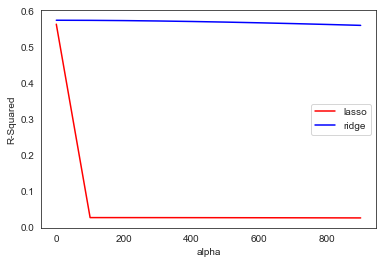

In [45]:
sns.set_style('white')
sns.lineplot(
    x=param.alpha,
    y=param.lasso_r_sq,
    color='red',
    label='lasso'
)
sns.lineplot(
    x=param.alpha,
    y=param.ridge_r_sq,
    color='blue',
    label='ridge'
)
plt.ylabel('R-Squared')
plt.legend()
plt.show()

The R-Squared values for Ridge and Lasso do yield a similar R-Squared value when alpha is near zero. However, the R-squared value quickly approaches zero for the lasso model as all of the coefficients are nearing zero.